In [1]:
import numpy as np
from numpy import random
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import mnist
from keras.optimizers import RMSprop, Adam

Using TensorFlow backend.


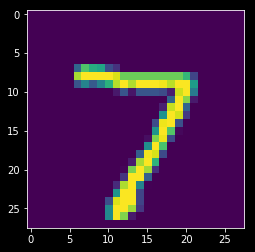

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# first to modify the data format
X_train = np.reshape(X_train, (-1, 28, 28, 1))
# -1 用来变成4维，前面加了一个batch_size以符合模型的训练要求
X_test = np.reshape(X_test, (-1, 28, 28, 1))
plt.imshow(X_train[0, :, :, 0])
plt.imshow(X_test[0, :, :, 0])
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


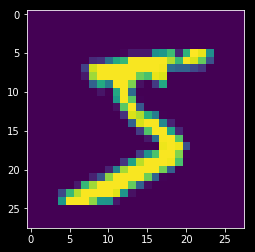

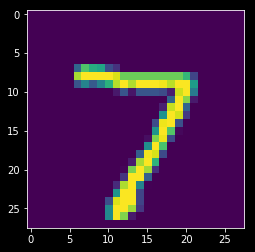

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# first to modify the data format
X_train = np.reshape(X_train, (-1, 28, 28, 1))
# -1 用来变成4维，前面加了一个batch_size以符合模型的训练要求
X_test = np.reshape(X_test, (-1, 28, 28, 1))
plt.imshow(X_train[0, :, :, 0])
plt.figure()
plt.imshow(X_test[0, :, :, 0])
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


In [4]:
model = Sequential()
# convolution fliters = 32, padding = 0, strides = 1,input_shape = 28*28
model.add(Conv2D(
    input_shape=(28, 28, 1),
    filters=32,
    kernel_size=(5, 5),
    padding="same",
    data_format="channels_last"
))
# activation
model.add(Activation('relu'))
# pooling
model.add(MaxPool2D(
    pool_size=(2, 2),
    strides=(2, 2),
    data_format="channels_last",
    padding="same"
))
# convolution number of filters=20,kernel_size=(3,3)
model.add(Conv2D(
    filters=64,
    padding='same',
    kernel_size=(5, 5),
    data_format="channels_last"
))
# activation
model.add(Activation('relu'))
# pooling
model.add(MaxPool2D(
    strides=(2, 2),
    padding='same',
    data_format="channels_last"
))

# Flatten for using Dense
model.add(Flatten())

model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
# 结构建成

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
adam = Adam()
# compile
model.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

In [6]:
# training using fit
model.fit(X_train, y_train, batch_size=64, epochs=1)


Instructions for updating:
Use tf.cast instead.
Epoch 1/1
60000/60000 [==============================] - 296s 5ms/step - loss: 14.6605 - acc: 0.0902


In [7]:
# test
loss, accuracy = model.evaluate(X_test, y_test)


10000/10000 [==============================] - 11s 1ms/step


In [8]:
print(loss)
print(accuracy)

14.680361064147949
0.0892


In [9]:
pred = model.predict(X_test[0])


ValueError: Error when checking input: expected conv2d_1_input to have 4 dimensions, but got array with shape (28, 28, 1)

In [10]:
pred = model.predict(X_test)
print(pred[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:
adam = Adam(lr=1e-4)
# compile
model.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

In [12]:
# training using fit
model.fit(X_train, y_train, batch_size=64, epochs=1)


Epoch 1/1
 5376/60000 [=>............................] - ETA: 3:56 - loss: 14.5800 - acc: 0.0954

KeyboardInterrupt: 

In [13]:
# test
loss, accuracy = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 10s 1ms/step


In [14]:
pred = model.predict(X_test)
print(pred[0])


In [1]:
from keras.optimizers import Adam
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.utils import np_utils
from keras.datasets import mnist

# please note, all tutorial code are running under python3.5.
# If you use the version like python2.7, please modify the code accordingly

# 6 - CNN example

# to try tensorflow, un-comment following two lines
# import os
# os.environ['KERAS_BACKEND']='tensorflow'

import numpy as np
np.random.seed(1337)  # for reproducibility

# download the mnist to the path '~/.keras/datasets/' if it is the first time to be called
# training X shape (60000, 28x28), Y shape (60000, ). test X shape (10000, 28x28), Y shape (10000, )
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# data pre-processing
# X_train = X_train.reshape(-1, 1, 28, 28)/255.
X_train = X_train.reshape(-1,  28, 28, 1)
X_test = X_test.reshape(-1,  28, 28, 1)
# X_test = X_test.reshape(-1, 1, 28, 28)/255.
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

Using TensorFlow backend.


In [2]:
# Another way to build your CNN
model = Sequential()

# Conv layer 1 output shape (32, 28, 28)
model.add(Convolution2D(
    input_shape=(28, 28, 1),
    filters=32,
    kernel_size=5,
    strides=1,
    padding='same'     # Padding method
))
model.add(Activation('relu'))

# Pooling layer 1 (max pooling) output shape (32, 14, 14)
model.add(MaxPooling2D(
    pool_size=2,
    strides=2,
    padding='same'    # Padding method
))

# Conv layer 2 output shape (64, 14, 14)
model.add(Convolution2D(64, 5, strides=1,
                        padding='same'
                        ))
model.add(Activation('relu'))

# Pooling layer 2 (max pooling) output shape (64, 7, 7)
model.add(MaxPooling2D(2, 2, 'same'))

# Fully connected layer 1 input shape (64 * 7 * 7) = (3136), output shape (1024)
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))

# Fully connected layer 2 to shape (10) for 10 classes
model.add(Dense(10))
model.add(Activation('softmax'))

# Another way to define your optimizer
adam = Adam(lr=1e-4)

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
# We add metrics to get more results you want to see
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
print('Training ------------')

# Another way to train the model
model.fit(X_train, y_train, epochs=1, batch_size=64,)

Training ------------
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
60000/60000 [==============================] - 398s 7ms/step - loss: 5.2655 - acc: 0.6523


In [5]:
print('\nTesting ------------')
# Evaluate the model with the metrics we defined earlier
loss, accuracy = model.evaluate(X_test, y_test)


Testing ------------
10000/10000 [==============================] - 10s 996us/step


In [6]:
print('\ntest loss: ', loss)
print('\ntest accuracy: ', accuracy)



test loss:  0.10748265247654636

test accuracy:  0.9668
